In [194]:
# This notebook requires healpy version 1.9.1 or greater in order to work properly.
import math

import healpy as hp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

#from lsst.sims.utils import Site

%matplotlib inline
#obs_site = Site(name='LSST')

In [195]:
# LSST field diameter in degrees
lsst_field_diameter = 3.5 
lsst_field_area = math.pi * (lsst_field_diameter / 2.0)**2
print("LSST Field Area: {} sqr. degrees".format(lsst_field_area))
NSIDE = 32
print("NSIDE = {}".format(NSIDE))
print("Number of pixels: {}".format(hp.nside2npix(NSIDE)))
resolution = math.degrees(hp.nside2resol(NSIDE))
print("Resolution: {} degrees".format(resolution))
print("Area: {} sqr. degrees".format(hp.nside2pixarea(NSIDE, True)))
indicies = np.arange(hp.nside2npix(NSIDE))
values = np.arange(hp.nside2npix(NSIDE), dtype=np.float64)

LSST Field Area: 9.62112750162 sqr. degrees
NSIDE = 32
Number of pixels: 12288
Resolution: 1.83225941964 degrees
Area: 3.35717458084 sqr. degrees


In [196]:
hp_altitude_rad, azimuth_rad = hp.pix2ang(NSIDE, indicies)
altitude_rad = np.pi/2. - hp_altitude_rad
altitude = np.degrees(altitude_rad)
azimuth = np.degrees(azimuth_rad)
alt_mask = np.where(altitude > 0.)
viz_alt = altitude[alt_mask]
#print(alt_mask)
#print(viz_alt.size)
values[np.where(altitude < 0.)] = hp.UNSEEN

In [197]:
#telescope_min_alt = 30.0
#diff_alt = 90.0 - telescope_min_alt
horizon = mpatches.Circle((0.0, math.radians(45.0)), radius=math.radians(lsst_field_diameter/2.), color='k', fill=False)

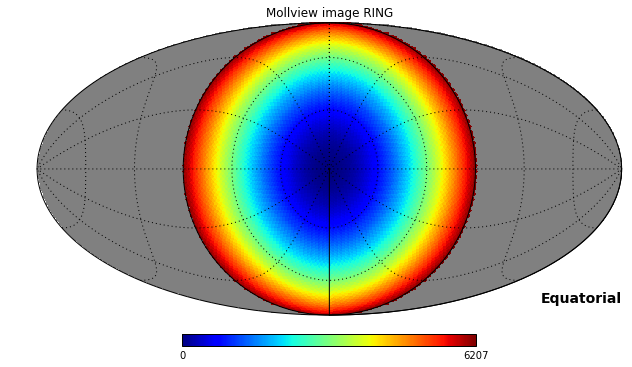

In [198]:
#fig = plt.figure(1)
#hp.mollview(values, title="Mollview image RING", flip='astro', rot=(0., 90.0), fig=fig.number)
hp.mollview(values, title="Mollview image RING", flip='astro', coord=('C'), rot=(0., 90.0))
hp.graticule(verbose=False)
ax = plt.gca()
#ax.add_patch(horizon)
#im = ax.get_images()[0]

In [199]:
#print(type(mmap))
#print(mmap)
#mmap.size
hp.write_map("test.fits", values)